In [6]:
import gradio as gr

def greet(name, intensity):
    return "Hello " * intensity + name + "!"

demo = gr.Interface(
    fn=greet,
    inputs=["text", "slider"],
    outputs=["text"],
)

demo.launch(share=False)

Running on local URL:  http://127.0.0.1:7865


ConnectError: [WinError 10061] 由于目标计算机积极拒绝，无法连接。

In [3]:
from pathlib import Path
pa="checkpoints"
p=Path(pa)
print(p.parent)
epoch=10
checkpoint_name = "checkpoint_{}_epoch.pkl".format(epoch)
checkpoint_path = p.joinpath(checkpoint_name)
print(checkpoint_path)

.
checkpoints\checkpoint_10_epoch.pkl


In [4]:
from pathlib import Path

# 创建一个Path对象，表示"checkpoint"目录
checkpoint_dir = Path("checkpoints")

# 如果"checkpoint"目录不存在，则创建它
if not checkpoint_dir.exists():
    checkpoint_dir.mkdir()

# 文件名
file_name = "example.txt"

# 创建文件路径，将文件保存在"checkpoint"目录下
file_path = checkpoint_dir / file_name

# 示例写入一些内容到文件
with file_path.open(mode="w") as file:
    file.write("Hello, this is an example content.")

# 打印文件路径
print(f"File saved at: {file_path}")


File saved at: checkpoints\example.txt


In [14]:
import numpy as np
# example = np.random.randint(1000, size=1000000)
# print(example.shape)
# print(example.reshape(-1,1).shape)
random_array = np.random.randint(10,size=100)
print(random_array[:10])

[8 1 3 6 6 4 8 6 6 5]


In [132]:
import pandas as pd

# 创建包含三种特征的DataFrame
data = {
    "Feature1": [x for x in np.random.randint(20,high=200,size=1000)],
    "Feature2": [x for x in np.random.randint(30,high=300,size=1000)],
    "Feature3": [x for x in np.random.randint(40,high=400,size=1000)]
    # "Feature4": [1, 2, 3, 4,  5],
}

df = pd.DataFrame(data)

Feature1=df["Feature1"]
Feature2=df["Feature2"]
Feature3=df["Feature3"]
newfeature=[x*(y^3)/(x* (z^2)) for x,y,z in zip(Feature1,Feature2,Feature3)]


df["Feature4"]=newfeature
df["target"]=[x+np.random.randint(3) for x in newfeature]
# print(df)

without4=df.drop("Feature4", axis=1)

# df['Feature4'][:20]
print(without4)
print(df)

     Feature1  Feature2  Feature3    target
0         129       299        86  4.523810
1          56       199        78  3.578947
2          49       188       157  2.201258
3         115       206       392  0.520305
4         166        35       261  1.121673
..        ...       ...       ...       ...
995       135       267       262  2.015385
996       137        43       351  2.114613
997        84       133       301  2.442244
998       184       272       251  1.104418
999        76       155       199  1.771574

[1000 rows x 4 columns]
     Feature1  Feature2  Feature3  Feature4    target
0         129       299        86  3.523810  4.523810
1          56       199        78  2.578947  3.578947
2          49       188       157  1.201258  2.201258
3         115       206       392  0.520305  0.520305
4         166        35       261  0.121673  1.121673
..        ...       ...       ...       ...       ...
995       135       267       262  1.015385  2.015385
996       137  

In [135]:
from sklearn import linear_model
from sklearn import metrics 
from sklearn import ensemble
from sklearn import preprocessing

feature=[f for f in df.columns if f not in ("target")]
without4f=[f for f in without4.columns if f not in ("target")]

print(feature)
print(without4f)
#前800个为训练数据
# df_train=df[:800].reset_index(drop=True)
# df_valid=df[:-200].reset_index(drop=True)

df_train=without4[:800].reset_index(drop=True)
df_valid=without4[:-200].reset_index(drop=True)


print(df_train.target.values.shape)
print(df_train.shape)

# x_train = df_train[feature].values
# x_test=df_valid[feature].values

x_train = df_train[without4f].values
x_test=df_valid[without4f].values

print(x_train.shape)
# model = ensemble.RandomForestClassifier(n_jobs=-1)
model=linear_model.LinearRegression()


model.fit(x_train,df_train.target.values)
valid_preds = model.predict(x_test)
score=model.score(x_test,df_valid.target.values)

print(score)

# auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
# print(auc)
ans=[a-b for a,b in zip(valid_preds,df_valid.target.values)]
print(ans)
# print(valid_preds)
# print(df_valid.target.values)

['Feature1', 'Feature2', 'Feature3', 'Feature4']
['Feature1', 'Feature2', 'Feature3']
(800,)
(800, 4)
(800, 3)
0.3962631301650519
[-0.9070928469794168, -0.4911075087047978, 0.3740786323997316, 0.7911441163503271, -0.15650075306713584, 1.011661303694524, 0.9537431118875788, 0.21025572288489114, 1.5225335486586746, -1.1190476865238914, -0.7481649267661763, 0.7167904682747543, -1.457917028636782, 0.9078854109081941, -1.020814341854206, 1.3316230551059713, 1.1858452840611362, -0.04314960114440791, 0.3242070731210491, 1.3022665617333486, 1.3544569538805584, -0.5756711405098305, -1.0599056756823426, 0.507546654666915, -1.2652027836482107, -0.26936345142031115, 0.3011521877248424, 1.0449272059383163, -1.1354407978140535, -0.6306549481067072, 0.5047262925388489, 0.10441353018563215, 0.3698596214319254, 1.2006689236337897, 0.8805295393694822, 1.3670918613730396, 1.2375336815532996, 0.4320328957107611, -0.6581464888091997, -0.05278354215248093, 0.1388702781756712, -1.1547955806494627, -0.8835643

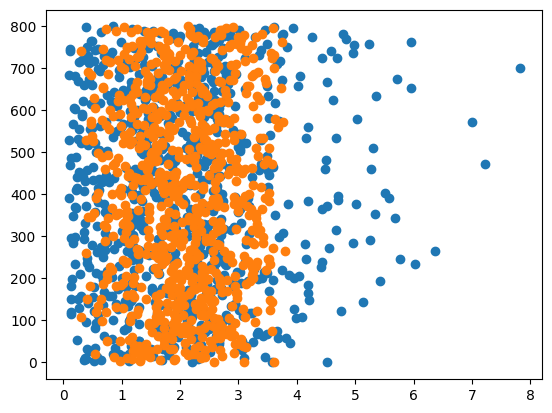

In [136]:
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(df_valid.target.values,[x for x in range(len(df_valid.target.values))])
plt.scatter(valid_preds,[x for x in range(len(valid_preds))])
plt.show()


In [142]:
import pandas as pd

s = pd.date_range('2020-01-06', '2020-01-10', freq='10H').to_series() 
 
# create some features based on datetime 
features = { 
    "dayofweek": s.dt.dayofweek.values, 
    "dayofyear": s.dt.dayofyear.values, 
    "hour": s.dt.hour.values, 
    "is_leap_year": s.dt.is_leap_year.values, 
    "quarter": s.dt.quarter.values, 
    # "weekofyear": s.dt.weekofyear.values 
}

df = pd.DataFrame(features)
# df.loc[:, 'year'] = df['datetime_column'].dt.year 
# df.loc[:, 'weekofyear'] = df['datetime_column'].dt.weekofyear 
# df.loc[:, 'month'] = df['datetime_column'].dt.month 
# df.loc[:, 'dayofweek'] = df['datetime_column'].dt.dayofweek

print(df)



AttributeError: 'DatetimeProperties' object has no attribute 'weekofyear'